In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("C://Users//Aditya//Desktop//greatlearning//ML//Loan Prediction 3//train_LP.csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
test = pd.read_csv("C://Users//Aditya//Desktop//greatlearning//ML//Loan Prediction 3//test_LP.csv")
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
print(train.columns)
print(test.columns)

# We have 12 independent variables and 1 target variable, i.e. Loan_Status in the train dataset.
# We have similar features in the test dataset as the train dataset except the Loan_Status. 
# We will predict the Loan_Status using the model built using the train data.

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [5]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
print(train.shape)
print(test.shape)

# We have 614 rows and 13 columns in the train dataset and 367 rows and 12 columns in test dataset.

(614, 13)
(367, 12)


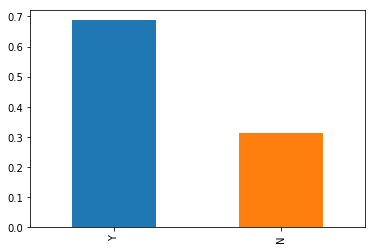

In [7]:
#train['Loan_Status'].value_counts().plot.bar()
train['Loan_Status'].value_counts(normalize=True).plot.bar(figsize=(6,4))

In [8]:
# Barplotor Categorical Variables

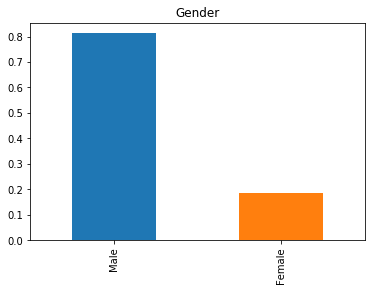

In [9]:
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(6,4), title= 'Gender') 

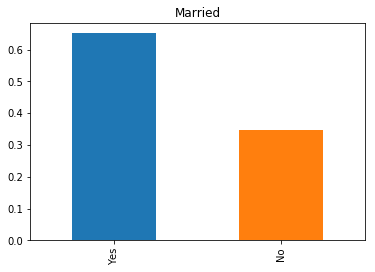

In [10]:
train['Married'].value_counts(normalize=True).plot.bar(figsize=(6,4), title= 'Married')

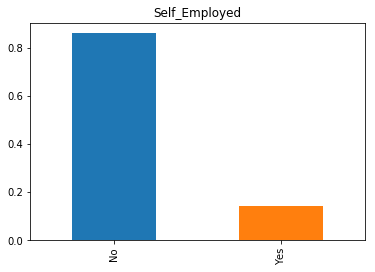

In [11]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(6,4), title= 'Self_Employed')

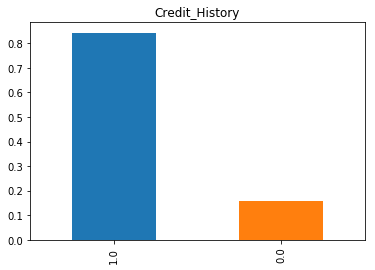

In [12]:
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(6,4), title= 'Credit_History')

It can be inferences from the above countplot that:
    
80% applicants in the dataset are male.
Around 65% of the applicants in the dataset are married.
Around 15% applicants in the dataset are self employed.
Around 85% applicants have repaid their debts

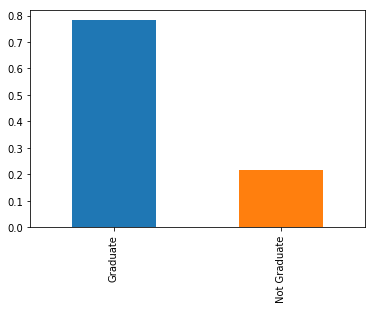

In [13]:
train['Education'].value_counts(normalize= True).plot.bar(figsize = (6,4))

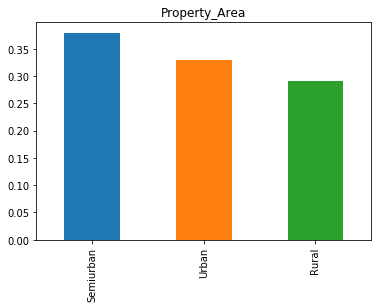

In [14]:
train['Property_Area'].value_counts(normalize= True).plot.bar(figsize = (6,4), title = 'Property_Area')

From above: 
Around 80% of the applicants are Graduate.
Most of the applicants are from Semiurban area.

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


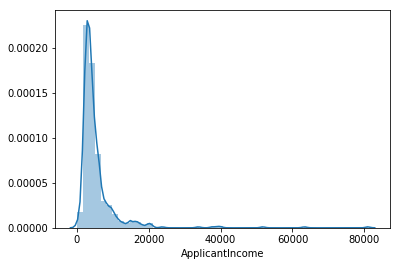

In [15]:
# ApplicantIncome

sns.distplot(train['ApplicantIncome'])

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed.

Text(0.5, 0.98, '')

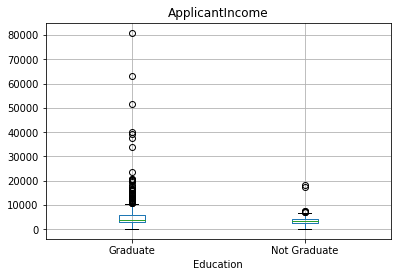

In [16]:
train.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

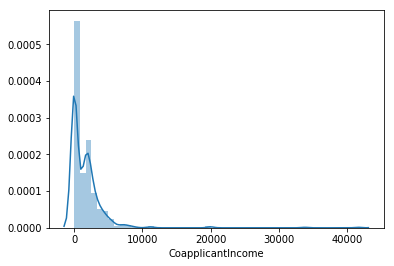

In [17]:
# CoApplicantIncome
sns.distplot(train['CoapplicantIncome'])

AxesSubplot(0.125,0.125;0.775x0.755)


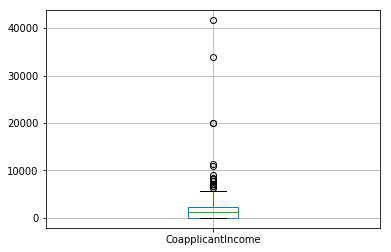

In [18]:
print(train.boxplot('CoapplicantIncome'))

Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

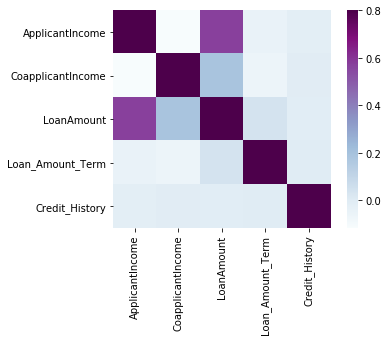

In [19]:
sns.heatmap(train.corr(), vmax=.8, square=True, cmap="BuPu")

We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

In [20]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
train.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [22]:
train.Gender.fillna(value="Male", inplace = True)

In [23]:
train.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [24]:
train.Married.fillna(value="Yes", inplace = True)

In [25]:
train.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [26]:
train.Dependents.fillna(value = 0, inplace = True)

In [27]:
train.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [28]:
train.Self_Employed.fillna(value="No", inplace = True)

In [29]:
train.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [30]:
train.Credit_History.fillna(value=1.0, inplace = True)

In [31]:
train.Loan_Amount_Term.describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

In [32]:
train.Loan_Amount_Term.fillna(value=360.0, inplace = True)

In [33]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [34]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

missing values in train data has been filled

In [35]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [36]:
test.Gender.value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [37]:
test.Gender.fillna(value="Male", inplace = True)

In [38]:
test.Dependents.value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [39]:
test.Dependents.fillna(value=0, inplace = True)

In [40]:
test.Self_Employed.value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [41]:
test.Self_Employed.fillna(value='No', inplace = True)

In [42]:
test.Credit_History.value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [43]:
test.Credit_History.fillna(value=1.0, inplace = True)

In [44]:
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [45]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [46]:
train.shape

(614, 13)

In [47]:
test.shape

(367, 12)

In [48]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])

In [49]:
test['LoanAmount_log'] = np.log(test['LoanAmount'])

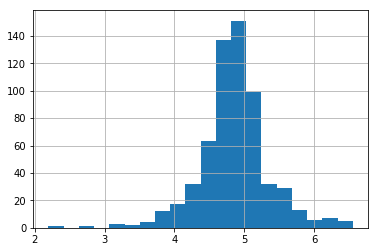

In [50]:
train['LoanAmount_log'].hist(bins=20)

In [52]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome'] 
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

C:\Users\Aditya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


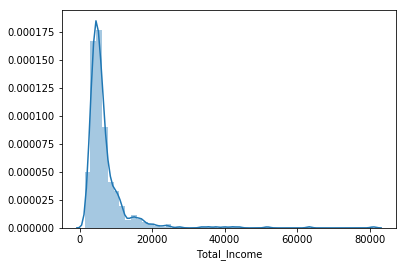

In [53]:
sns.distplot(train['Total_Income'])

In [54]:
train['Total_Income_log'] = np.log(train['Total_Income']) 
test['Total_Income_log'] = np.log(test['Total_Income'])

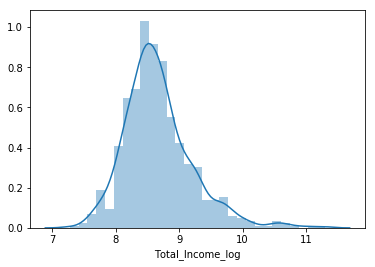

In [55]:
sns.distplot(train['Total_Income_log'])

In [56]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term'] 
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

In [57]:
train['Balance Income']=train['Total_Income']-(train['EMI']*1000) # Multiply with 1000 to make the units equal 
test['Balance Income']=test['Total_Income']-(test['EMI']*1000)

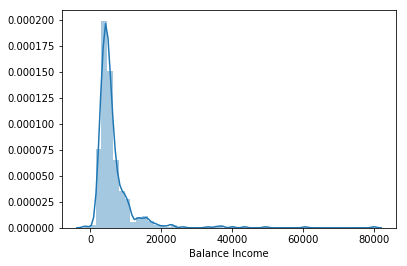

In [58]:
sns.distplot(train['Balance Income'])

In [59]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [61]:
train.Loan_Status = le.fit_transform(train.Loan_Status)

In [62]:
newtrain=train.drop('Loan_ID',axis=1) 
newtest=test.drop('Loan_ID',axis=1)

In [63]:
newtrain.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log,EMI,Balance Income
0,Male,No,0,Graduate,No,1.0,Urban,1,4.852030,5849.0,8.674026,0.355556,5493.444444
1,Male,Yes,1,Graduate,No,1.0,Rural,0,4.852030,6091.0,8.714568,0.355556,5735.444444
2,Male,Yes,0,Graduate,Yes,1.0,Urban,1,4.189655,3000.0,8.006368,0.183333,2816.666667
3,Male,Yes,0,Not Graduate,No,1.0,Urban,1,4.787492,4941.0,8.505323,0.333333,4607.666667
4,Male,No,0,Graduate,No,1.0,Urban,1,4.948760,6000.0,8.699515,0.391667,5608.333333


In [64]:
ohe_train=pd.get_dummies(newtrain) 
ohe_test=pd.get_dummies(newtest)

In [65]:
ohe_train.head()

,Credit_History,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log,EMI,Balance Income,Gender_Female,Gender_Male,Married_No,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,1,4.852030,5849.0,8.674026,0.355556,5493.444444,0,1,1,...,0,0,0,1,0,1,0,0,0,1
1,1.0,0,4.852030,6091.0,8.714568,0.355556,5735.444444,0,1,0,...,1,0,0,1,0,1,0,1,0,0
2,1.0,1,4.189655,3000.0,8.006368,0.183333,2816.666667,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,1.0,1,4.787492,4941.0,8.505323,0.333333,4607.666667,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,1.0,1,4.948760,6000.0,8.699515,0.391667,5608.333333,0,1,1,...,0,0,0,1,0,1,0,0,0,1


In [66]:
ohe_test.head()

,Credit_History,LoanAmount_log,Total_Income,Total_Income_log,EMI,Balance Income,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,4.700480,5720,8.651724,0.305556,5414.444444,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
1,1.0,4.836282,4576,8.428581,0.350000,4226.000000,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
2,1.0,5.337538,6800,8.824678,0.577778,6222.222222,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
3,1.0,4.605170,4886,8.494129,0.277778,4608.222222,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
4,1.0,4.356709,3276,8.094378,0.216667,3059.333333,0,1,1,0,...,0,0,0,0,1,1,0,0,0,1


In [67]:
ohe_train.shape

(614, 23)

In [68]:
ohe_test.shape

(367, 22)

In [69]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [70]:
scaled_train = pd.DataFrame(sc.fit_transform(ohe_train),columns=ohe_train.columns)

C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [71]:
scaled_test = pd.DataFrame(sc.fit_transform(ohe_test),columns=ohe_test.columns)

C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [72]:
x= scaled_train.drop("Loan_Status", axis =1)
y= ohe_train.Loan_Status

In [73]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [75]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()

In [76]:
lr.fit(x,y)

C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [77]:
predict = lr.predict(scaled_test)

In [78]:
predict

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [79]:
solution = pd.DataFrame({"Loan_ID": test.Loan_ID, 
                        "Loan_Status": predict})

In [80]:
solution.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [81]:
solution['Loan_Status'].replace(0, 'N',inplace=True) 
solution['Loan_Status'].replace(1, 'Y',inplace=True)

In [82]:
solution.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [83]:
solution.to_csv("FLR.csv", index = False)